# 실습 6

2008.csv는 2008년 미국내 항공 기록입니다. 이 데이터를 이용해서 미국 국내 항공 네트워크를 만들고 네트워크 분석을 해보세요

In [19]:
import pandas as pd 
import numpy as np
import networkx as nx

df = pd.read_csv("data/2008.csv")
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2389217 entries, 0 to 2389216
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             float64
 20  TaxiOut            float64
 21  Cancelled          int64  
 22  CancellationCode   object 
 23  Diverted           int64  
 24  CarrierDelay       float64
 25  WeatherDelay      

(2389217, 29)

In [21]:
df.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [10]:
nodes = pd.concat ( [df.Origin, df.Dest] )
print(nodes.shape[0])
nodes = nodes.drop_duplicates()
print(nodes.shape[0])

4778434
293


In [24]:
edges = df[["Origin", "Dest"]]
G = nx.from_pandas_edgelist(edges, source='Origin', target='Dest')
print(G)

Graph with 293 nodes and 2605 edges


In [12]:
edges = df[["Origin", "Dest"]]

edges = edges.values.tolist()

In [13]:
G_directed = nx.DiGraph()

G_directed.add_nodes_from(nodes)
G_directed.add_edges_from(edges)


In [18]:
print(G_directed.in_degree)
print(G_directed.out_degree)

[('HOU', 33), ('HRL', 5), ('IAD', 61), ('IND', 35), ('ISP', 9), ('JAN', 13), ('JAX', 36), ('LAS', 90), ('LAX', 86), ('LBB', 8), ('LIT', 18), ('MAF', 7), ('MCI', 49), ('MCO', 77), ('MDW', 54), ('MHT', 17), ('MSY', 37), ('OAK', 32), ('OKC', 30), ('OMA', 22), ('ONT', 34), ('ORF', 22), ('PBI', 24), ('PDX', 40), ('PHL', 53), ('PHX', 88), ('PIT', 36), ('PVD', 20), ('RDU', 42), ('RNO', 23), ('RSW', 32), ('SAN', 53), ('SAT', 39), ('SDF', 27), ('SEA', 53), ('SFO', 62), ('SJC', 26), ('SLC', 105), ('SMF', 34), ('SNA', 25), ('STL', 51), ('TPA', 58), ('TUL', 25), ('TUS', 30), ('ABQ', 39), ('ALB', 16), ('AMA', 7), ('AUS', 47), ('BDL', 32), ('BHM', 30), ('BNA', 47), ('BOI', 17), ('BUF', 20), ('BUR', 12), ('BWI', 60), ('CLE', 72), ('CMH', 34), ('CRP', 4), ('DAL', 17), ('DEN', 118), ('DTW', 113), ('ELP', 18), ('FLL', 51), ('GEG', 17), ('ROC', 16), ('DAY', 16), ('ORD', 141), ('EWR', 88), ('SYR', 14), ('IAH', 112), ('LFT', 3), ('MKE', 41), ('CHS', 16), ('LCH', 1), ('CLT', 72), ('BTR', 8), ('CRW', 7), ('F

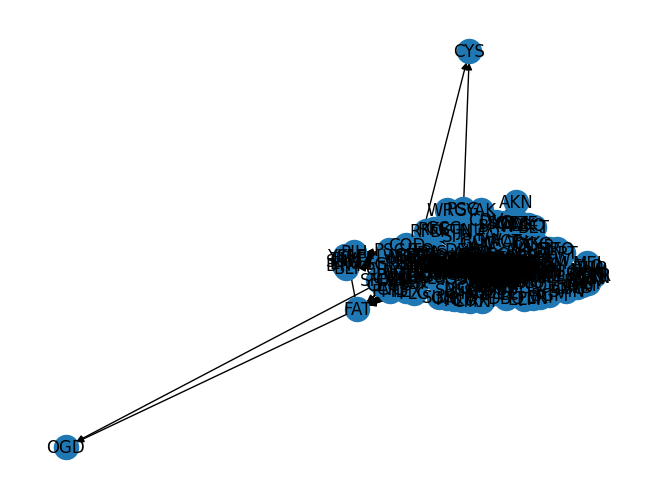

In [16]:

nx.draw(G_directed, with_labels=True)

In [29]:
%pip install community

Note: you may need to restart the kernel to use updated packages.


In [30]:
import community.community_louvain as cl
import matplotlib.cm as cm
import matplotlib.pyplot as plt

partition = cl.best_partition(G)
pos = nx.spring_layout(G)

cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

ModuleNotFoundError: No module named 'community.community_louvain'